In [2]:
# import the librarys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("movies_metadata.csv")
df=pd.read_csv("credits.csv")
print(data.shape)
print(df.shape)

(45466, 24)
(45476, 3)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [6]:
# both the col id col is common but  first we have to change data type and make same datatype
data['id'] = pd.to_numeric(data['id'],errors = 'coerce')

In [7]:
data['id'].isnull().sum()

3

In [8]:
# we simple drop that 3 null valus 
data.dropna(subset=["id"],inplace=True)

In [9]:
#data['id'].fillna(method='ffill',inplace=True)

In [10]:
data["id"]=data["id"].astype(int)

In [11]:
#merge the data on id col
data_set=pd.merge(data,df,on='id')

In [12]:
data_set.shape

(45538, 26)

In [13]:
data_set['id'].head()

0      862
1     8844
2    15602
3    31357
4    11862
Name: id, dtype: int32

In [14]:
data_set.sample(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
32585,False,NaN,1230000,"[{'id': 18, 'name': 'Drama'}]",NaN,353898,tt3449292,en,Manjhi The Mountain Man,"Using only a hammer and a chisel, a man spends...",...,121.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Manjhi The Mountain Man,False,6.8,16.0,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '55d65b7e92514167130002e7', 'de..."
24124,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,117969,tt0056082,en,House of Women,"An innocent, pregnant prison inmate (Shirley K...",...,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What The Streets Don't Teach This Jail Does!,House of Women,False,0.0,0.0,"[{'cast_id': 2, 'character': 'Erica Hayden', '...","[{'credit_id': '52fe4bc5c3a36847f821336d', 'de..."


In [15]:
data_set.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [16]:
data_set.nunique()

adult                        2
belongs_to_collection     1695
budget                    1223
genres                    4066
homepage                  7670
id                       45432
imdb_id                  45415
original_language           89
original_title           43370
overview                 44305
popularity               44174
poster_path              45020
production_companies     22707
production_countries      2390
release_date             17333
revenue                   6863
runtime                    353
spoken_languages          1931
status                       6
tagline                  20283
title                    42276
video                        2
vote_average                92
vote_count                1820
cast                     43019
crew                     44669
dtype: int64

In [17]:
# lets check the null values before doing EDA 
print(data_set.isnull().sum().sum())
((data_set.isnull().sum()/data_set.isnull().count())*100).sort_values(ascending=False)

105709


belongs_to_collection    90.118143
homepage                 82.889016
tagline                  55.116606
overview                  2.094954
poster_path               0.847644
runtime                   0.570952
release_date              0.191049
status                    0.184461
imdb_id                   0.037331
original_language         0.024156
spoken_languages          0.006588
revenue                   0.006588
production_countries      0.006588
production_companies      0.006588
title                     0.006588
video                     0.006588
vote_average              0.006588
vote_count                0.006588
popularity                0.006588
cast                      0.000000
adult                     0.000000
original_title            0.000000
id                        0.000000
genres                    0.000000
budget                    0.000000
crew                      0.000000
dtype: float64

In [100]:
#There are missing values in column director,cast,country and date_added.
#We can't randomly fill the missing values in columns of director and cast, so we can drop them.
#For minimal number of missing values in country and date_added,rating, we can fill them using mode(most common value) and mean.

In [101]:
data_set.duplicated().sum()

76

## univariate analysis and bavariate analysis -- explore each columns

<AxesSubplot:xlabel='vote_average', ylabel='count'>

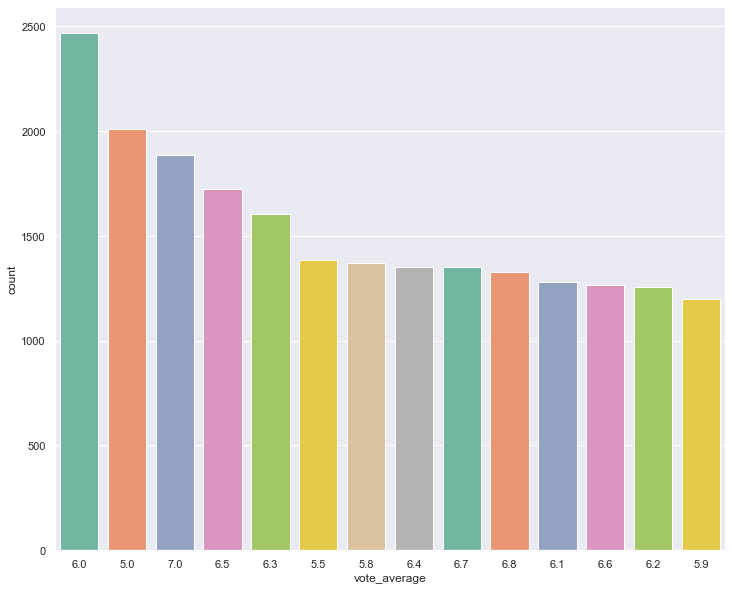

In [17]:
#MOVIES vote
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x="vote_average", data= data_set, palette="Set2", order=data_set['vote_average'].value_counts().index[1:15])


#### most of the movie voting avg is 6 and 5 

<AxesSubplot:xlabel='original_language', ylabel='count'>

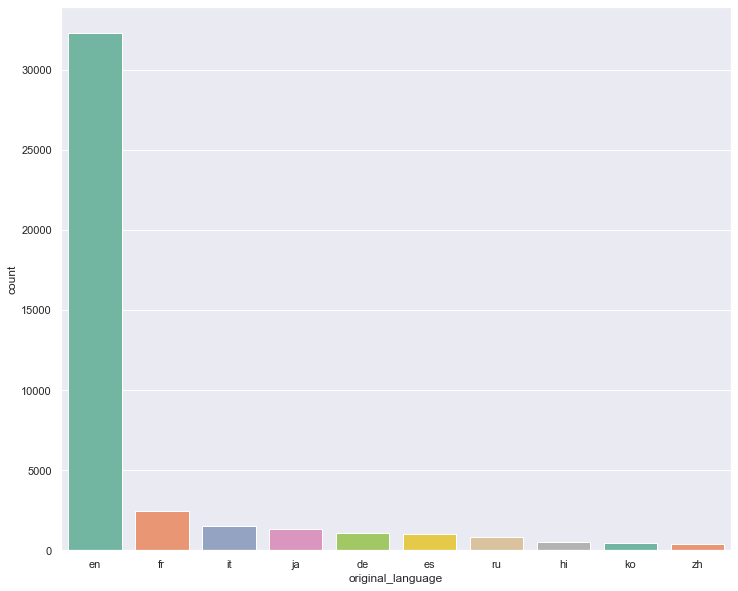

In [59]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x="original_language", data= data_set, palette="Set2", order=data_set['original_language'].value_counts().index[0:10])

#### most use lanugage is english . more than 3000 movies original_language is english 

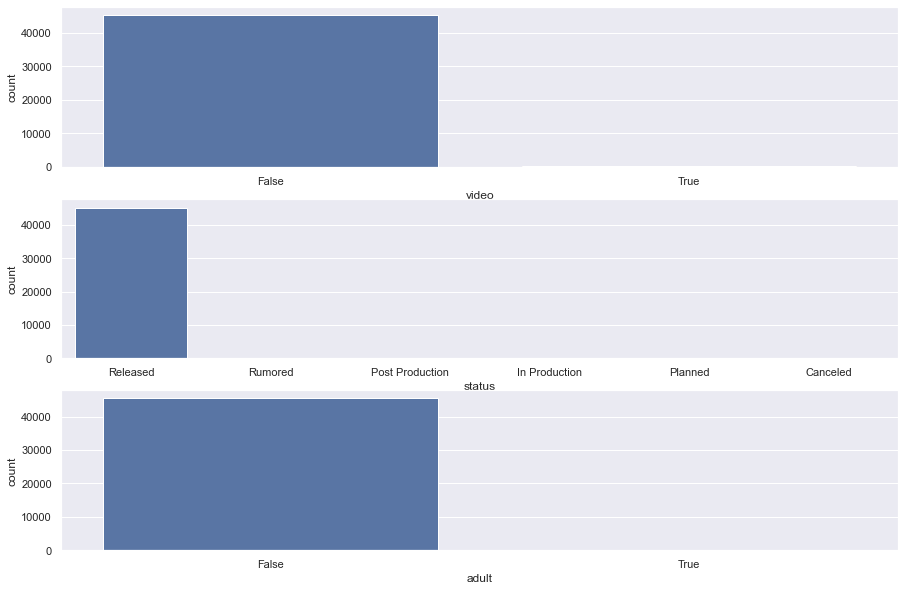

In [29]:
fig, axes = plt.subplots(3,1, figsize=(15,10), sharey=True)
sns.countplot(data_set['video'],ax=axes[0])
sns.countplot(data_set['status'],ax=axes[1])
sns.countplot(data_set['adult'],ax=axes[2])
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(y=release_data, data=data_set, palette="cool",hue=data_set['video'])

In [44]:
def convert(text):
    L = []
    for i in eval(text):
        L.append(i['name']) 
    return L 

In [45]:
data_set['genres'] = data_set['genres'].apply(convert)

In [46]:
data_set['genres']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45533                 [Drama, Family]
45534                         [Drama]
45535       [Action, Drama, Thriller]
45536                              []
45537                              []
Name: genres, Length: 45538, dtype: object

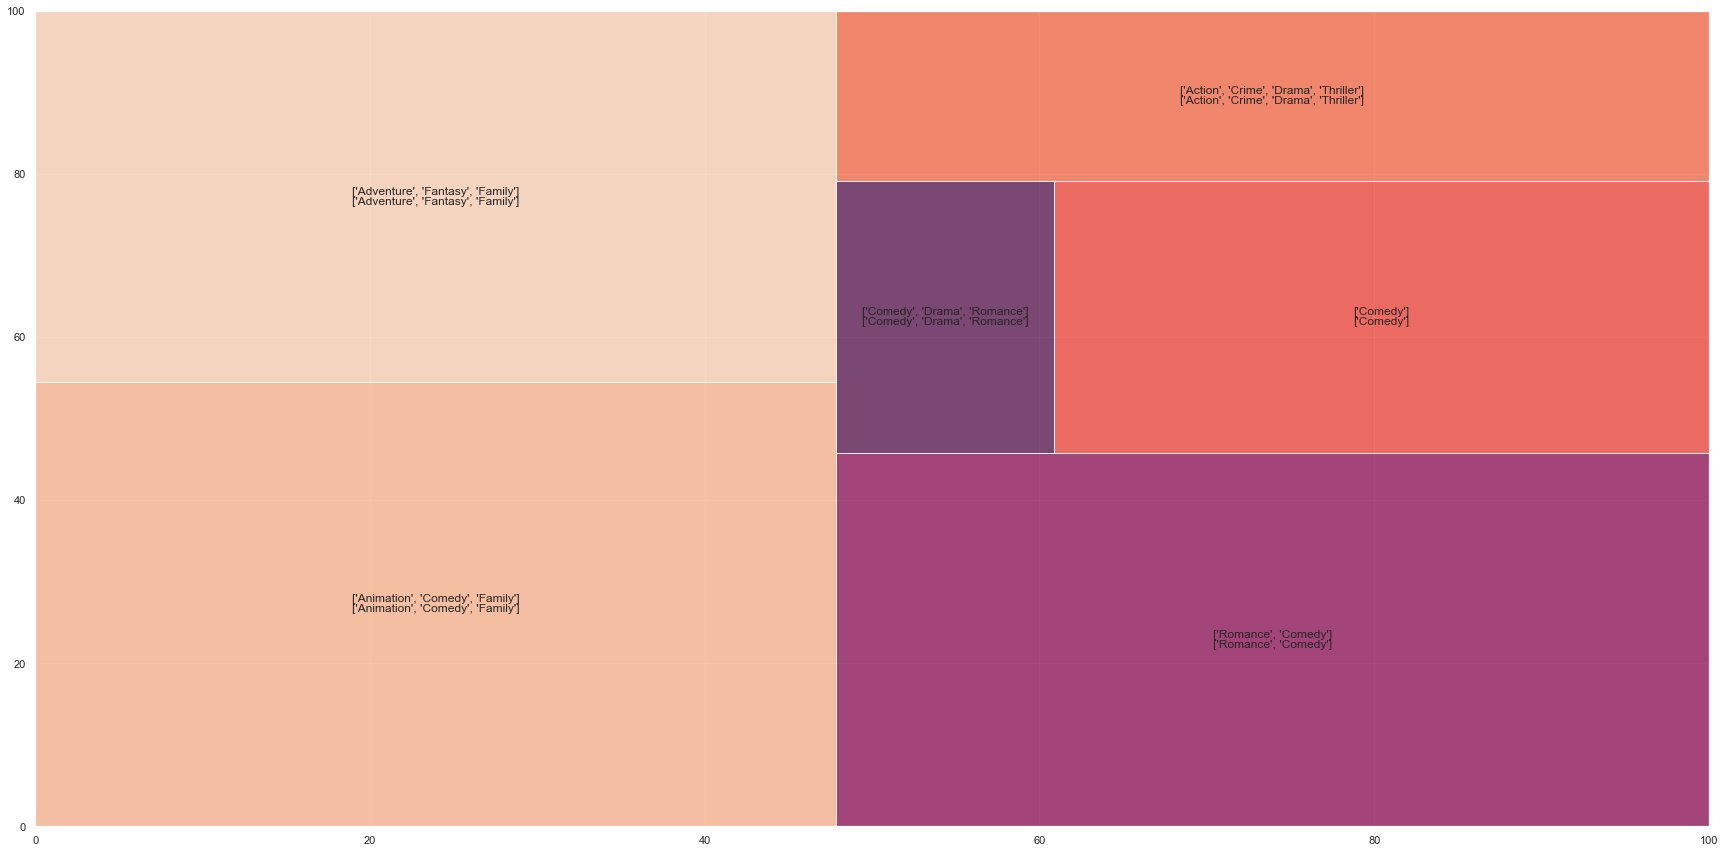

In [58]:
# GENRES BY Revenue
import squarify
plt.figure(figsize=(30,15))
squarify.plot(value= data_set['genres'],label= data_set['genres'], sizes=data_set['revenue'].value_counts(sort=True).index[1:7], alpha=0.8)
plt.show()

#### based on revenue [Adventure, Fantasy, Family] and [Romance, Comedy] ,[Adventure, Fantasy, Family].this three genre are higest on revenue

In [18]:
data_set['id']=data_set['id'].apply(pd.Series)

In [27]:
data_set.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [24]:
# Title of The Movie Having Runtime Greater Than or equal to 180 Minutes
a=data_set[data_set['runtime']>=180]['title']

In [70]:
a

13                                                  Nixon
358      The Wonderful, Horrible Life of Leni Riefenstahl
378                                            Wyatt Earp
522                                      Schindler's List
530                                            Short Cuts
                               ...                       
45291       Never Tear Us Apart: The Untold Story of INXS
45320                                               Muthu
45323                                    Sivaji: The Boss
45496                           The Prisoner of If Castle
45534                                 Century of Birthing
Name: title, Length: 596, dtype: object

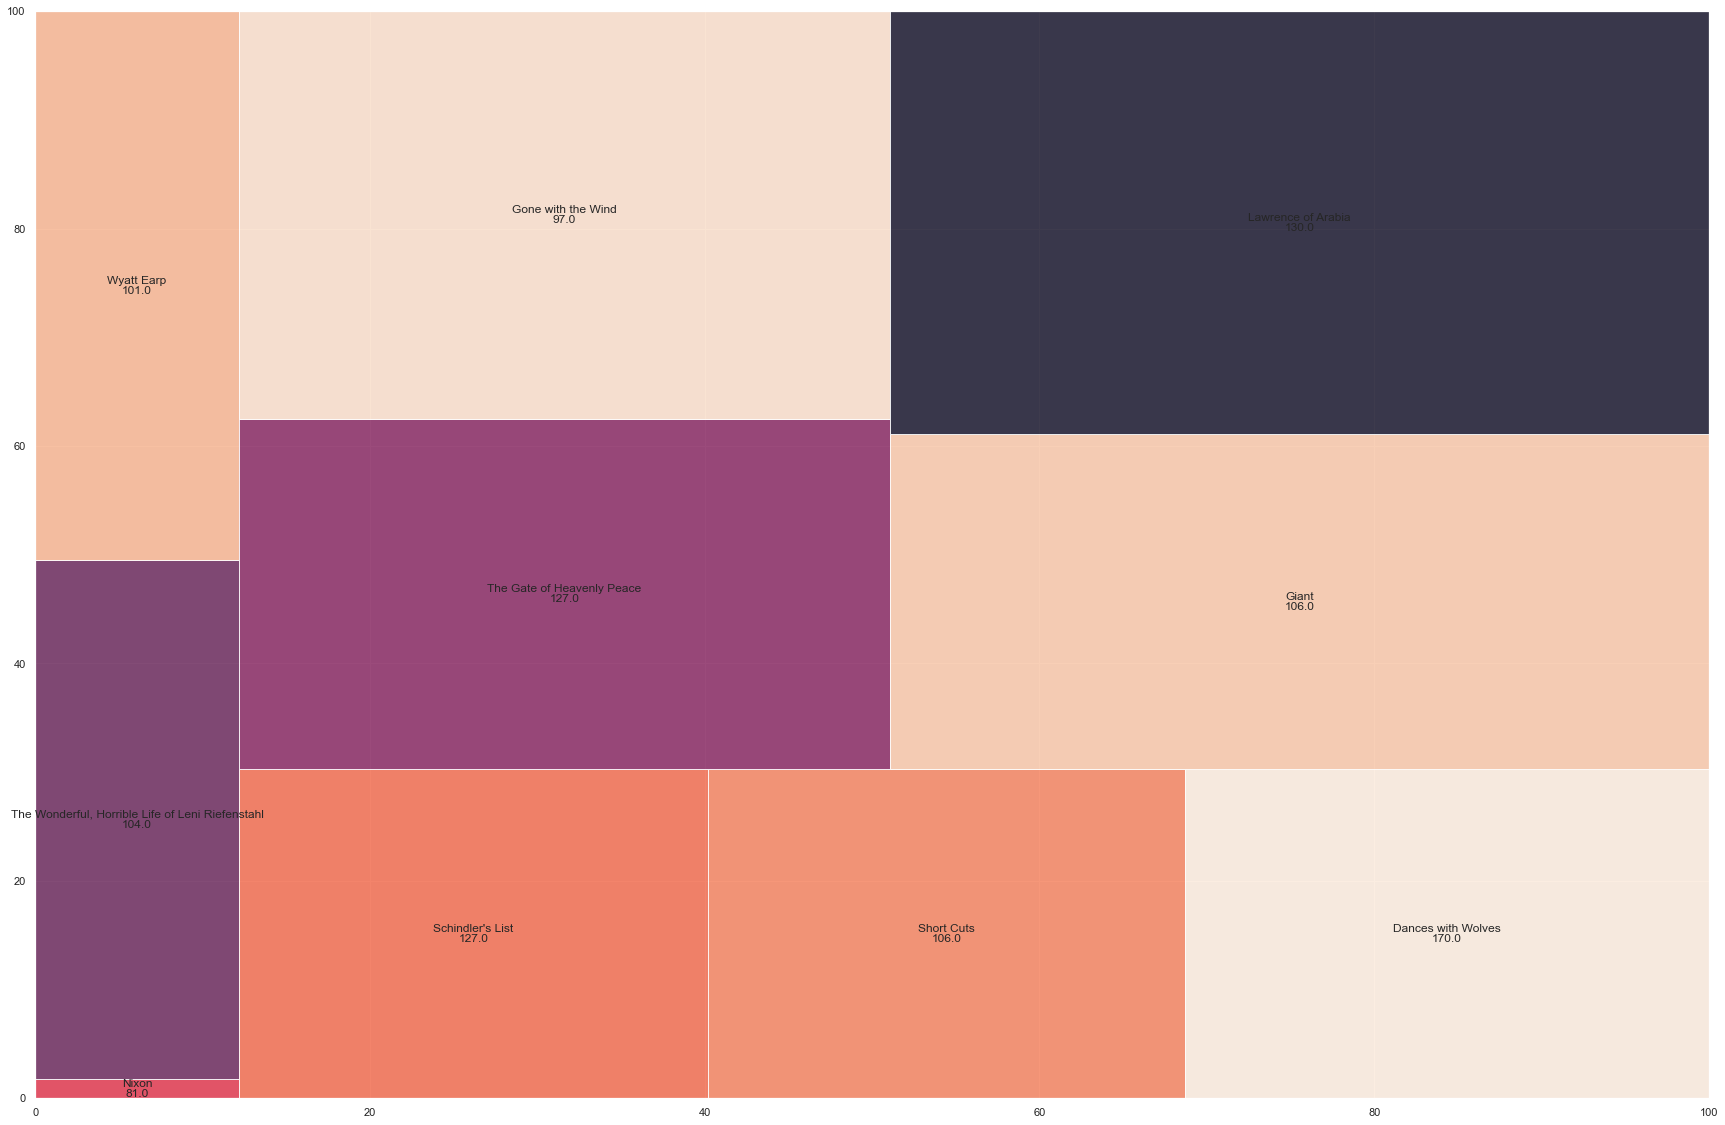

In [63]:
plt.figure(figsize=(30,20))
squarify.plot(value= data_set['runtime'],label= a, sizes=a.index[0:10], alpha=0.8)

plt.show()

#### based on runtime these movies is are on top five-----( Nixon),(Short Cuts),(Schindler's List),(Wyatt Earp),(The Wonderful, Horrible Life of Leni Riefenstahl),

In [102]:
def fetch_director(text):
    L = []
    for i in eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [103]:
data_set['crew'] = data_set['crew'].apply(fetch_director)

In [104]:
b=data_set["crew"].value_counts()

In [106]:
# you can see that these  director make max no of movie 
#[John Ford],[Michael Curtiz] ,[Alfred Hitchcock],[Werner Herzog]
b

[]                                                           887
[John Ford]                                                   63
[Michael Curtiz]                                              61
[Alfred Hitchcock]                                            52
[Werner Herzog]                                               52
                                                            ... 
[Joung Yumi]                                                   1
[Melville W. Brown]                                            1
[Rob Cowan]                                                    1
[Yoshiharu Ashino, Vladimir Zhelezniakov, Aljosha Klimov]      1
[Daisy Asquith]                                                1
Name: crew, Length: 18854, dtype: int64

In [105]:
# change col in to date time 
data_set['release_date'] = pd.to_datetime(data_set['release_date'],errors='coerce')

In [107]:
data_set['year'] = data_set['release_date'].dt.year

In [145]:
# Year with The Highest Average Revenue
highest_rev=data_set.groupby('year')['revenue'].sum().sort_values(ascending=False)

In [133]:
highest_rev

year
2016.0    3.049788e+10
2015.0    2.881936e+10
2013.0    2.666884e+10
2014.0    2.644612e+10
2012.0    2.605875e+10
              ...     
1913.0    0.000000e+00
1914.0    0.000000e+00
1917.0    0.000000e+00
1919.0    0.000000e+00
2020.0    0.000000e+00
Name: revenue, Length: 135, dtype: float64

<AxesSubplot:xlabel='year', ylabel='revenue'>

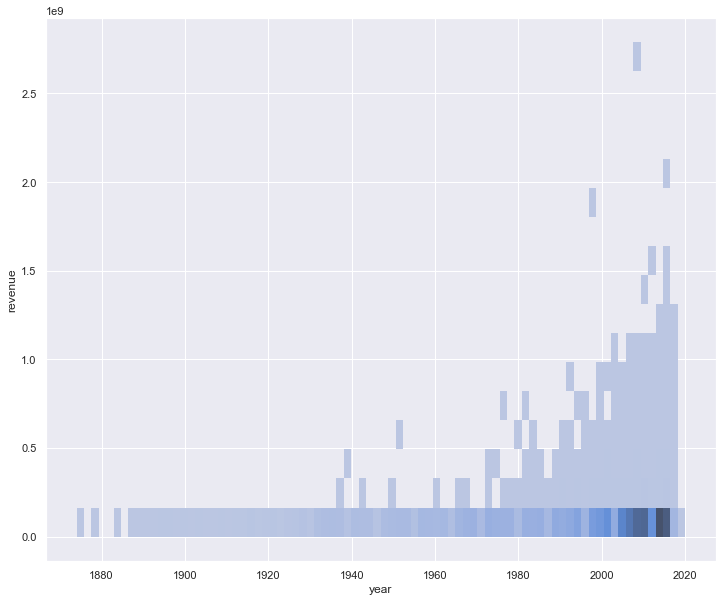

In [148]:
plt.figure(figsize=(12,10))
sns.histplot(x=data_set['year'],y=data_set['revenue'])


#### 2016 has the higest year in terms of revenue 

### top 10 moivies based on popularity

In [37]:
data_set['popularity'] = pd.to_numeric(data_set['popularity'],errors = 'coerce')

In [38]:
top_10 = data_set.nlargest(10,'popularity')[['title','popularity']].set_index('title')
top_10

,popularity
title,
Minions,547.488298
Wonder Woman,294.337037
Beauty and the Beast,287.253654
Baby Driver,228.032744
Big Hero 6,213.849907
Deadpool,187.860492
Guardians of the Galaxy Vol. 2,185.330992
Avatar,185.070892
John Wick,183.870374


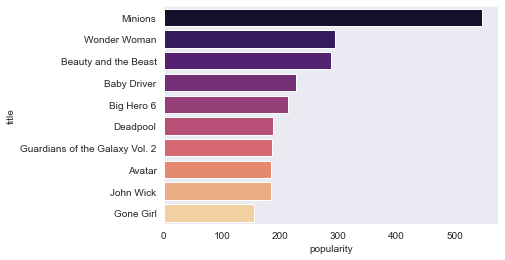

In [43]:
sns.set_style("dark")
sns.barplot(y= top_10.index,x='popularity',data=top_10, palette = 'magma')
plt.show()

### top 10 movies baed on runtime

In [49]:
top_10 = data_set.nlargest(10,'runtime')[['title','runtime']].set_index('title')
top_10

,runtime
title,
Centennial,1256.0
Jazz,1140.0
Baseball,1140.0
Berlin Alexanderplatz,931.0
Heimat: A Chronicle of Germany,925.0
The Story of Film: An Odyssey,900.0
Taken,877.0
The War,874.0
The Roosevelts: An Intimate History,840.0


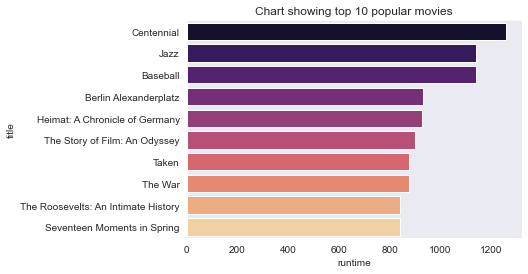

In [52]:
sns.set_style("dark")
plt.title('Chart showing top 10 runtime movies')
sns.barplot(x='runtime',y=top_10.index,data=top_10,palette = 'magma')
plt.show()

### top 10 higest budget movies 

In [54]:
data_set['budget'] = pd.to_numeric(data_set['budget'],errors = 'coerce')

In [55]:
top_10 = data_set.nlargest(10,'budget')[['title','budget']].set_index('title')
top_10

,budget
title,
Pirates of the Caribbean: On Stranger Tides,380000000
Pirates of the Caribbean: At World's End,300000000
Avengers: Age of Ultron,280000000
Superman Returns,270000000
Tangled,260000000
John Carter,260000000
Transformers: The Last Knight,260000000
Spider-Man 3,258000000
The Lone Ranger,255000000


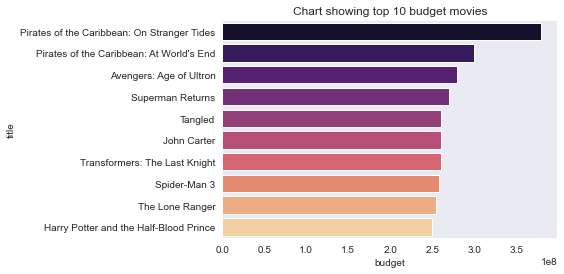

In [56]:
sns.set_style("dark")
plt.title('Chart showing top 10 budget movies')
sns.barplot(x='budget',y=top_10.index,data=top_10,palette = 'magma')
plt.show()

### top 10 higest earn movies 

In [57]:
top_10 = data_set.nlargest(10,'revenue')[['title','revenue']].set_index('title')
top_10

,revenue
title,
Avatar,2.787965e+09
Star Wars: The Force Awakens,2.068224e+09
Titanic,1.845034e+09
The Avengers,1.519558e+09
Jurassic World,1.513529e+09
Furious 7,1.506249e+09
Avengers: Age of Ultron,1.405404e+09
Harry Potter and the Deathly Hallows: Part 2,1.342000e+09
Frozen,1.274219e+09


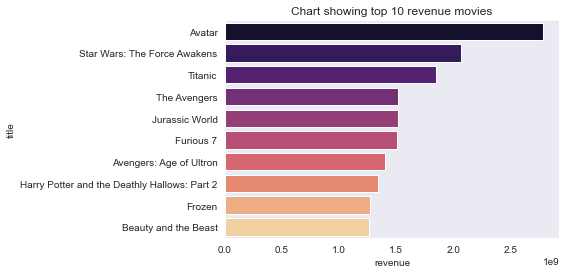

In [58]:
sns.set_style("dark")
plt.title('Chart showing top 10 revenue movies')
sns.barplot(x='revenue',y=top_10.index,data=top_10,palette = 'magma')
plt.show()

In [63]:
top_10 = data_set.nlargest(10,'revenue')[['title','production_companies']].set_index('title')
top_10

,production_companies
title,
Avatar,"[{'name': 'Ingenious Film Partners', 'id': 289..."
Star Wars: The Force Awakens,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Tru..."
Titanic,"[{'name': 'Paramount Pictures', 'id': 4}, {'na..."
The Avengers,"[{'name': 'Paramount Pictures', 'id': 4}, {'na..."
Jurassic World,"[{'name': 'Universal Studios', 'id': 13}, {'na..."
Furious 7,"[{'name': 'Universal Pictures', 'id': 33}, {'n..."
Avengers: Age of Ultron,"[{'name': 'Marvel Studios', 'id': 420}, {'name..."
Harry Potter and the Deathly Hallows: Part 2,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'..."
Frozen,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'..."


In [62]:
data_set.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [65]:
top_10 = data_set.nlargest(10,'revenue')[['title','production_countries']].set_index('title')
top_10

,production_countries
title,
Avatar,"[{'iso_3166_1': 'US', 'name': 'United States o..."
Star Wars: The Force Awakens,"[{'iso_3166_1': 'US', 'name': 'United States o..."
Titanic,"[{'iso_3166_1': 'US', 'name': 'United States o..."
The Avengers,"[{'iso_3166_1': 'US', 'name': 'United States o..."
Jurassic World,"[{'iso_3166_1': 'US', 'name': 'United States o..."
Furious 7,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_..."
Avengers: Age of Ultron,"[{'iso_3166_1': 'US', 'name': 'United States o..."
Harry Potter and the Deathly Hallows: Part 2,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'..."
Frozen,"[{'iso_3166_1': 'US', 'name': 'United States o..."


In [106]:
# df1=data_set.rdd.map(lambda x:(x.title,x.production_countries['iso_3166_1'],x.production_countries["name"])).toDF(['country',country_full_name])

In [105]:
#data_set['country']=data_set['production_countries'].str.extract('(a-z)\w{0,})',expand=True)

In [114]:
#I=[]
#for i in range():
#    I.append(data_set[i]["name"])